Cleaning of CPI Data

In [81]:
#Step 1: I imported all the basic packages I might need to use as a starting point.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#Step 2: Ensured all the data was moved from Excel to a dataframe. Some files required skipping rows to get to the data. Maintained a common nomenclature in snake case
Atlanta_CPI = pd.read_excel('Atlanta - CPI.xlsx')
Baltimore_CPI = pd.read_excel('Baltimore - CPI.xlsx', skiprows=11)
Boston_CPI = pd.read_excel('Boston - CPI.xlsx', skiprows=11)
Chicago_CPI = pd.read_excel('Chicago - CPI.xlsx', skiprows=11)
Denver_CPI = pd.read_excel('Denver - CPI.xlsx', skiprows=11)
Detroit_CPI = pd.read_excel('Detroit - CPI.xlsx', skiprows=11)
DFW_CPI = pd.read_excel('DFW - CPI.xlsx', skiprows=11)
Houston_CPI = pd.read_excel('Houston - CPI.xlsx', skiprows=11)
Hawaii_CPI = pd.read_excel('Hawaii - CPI.xlsx', skiprows=11)
LA_CPI = pd.read_excel('LA  - CPI.xlsx', skiprows=11)
Miami_CPI = pd.read_excel('Miami - CPI.xlsx', skiprows=11)
Minneapolis_CPI = pd.read_excel('Minneaplois - cPI.xlsx', skiprows=11)
NYC_CPI = pd.read_excel('NYC - CPI.xlsx', skiprows=11)
Philadelphia_CPI = pd.read_excel('Philadelphia - CPI.xlsx', skiprows=11)
Phoenix_CPI = pd.read_excel('Pheonix - CPI.xlsx', skiprows=11)
Riverside_CPI = pd.read_excel('Riverside - CPI.xlsx', skiprows=11)
SanDiego_CPI = pd.read_excel('San Diego - CPI.xlsx', skiprows=11)
SanFrancisco_CPI = pd.read_excel('San Francisco - CPI.xlsx', skiprows=11)
Seattle_CPI = pd.read_excel('Seattle - CPI.xlsx', skiprows=11)
StLouis_CPI = pd.read_excel('St. Louis - CPI.xlsx', skiprows=11)
Tampa_CPI = pd.read_excel('Tampa - CPI.xlsx', skiprows=11)
WashingtonDC_CPI = pd.read_excel('Washington DC - CPI.xlsx', skiprows=11)

C:\Users\camer\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\camer\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\camer\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\camer\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl'

In [83]:
#Step 3: The Baltimore list was missing annual amounts, so I ensured for the null annual amounts it averaged out from the month columns, then rounded it to three decimal places for consistency in the data.
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

mask_annual_na = Baltimore_CPI['Annual'].isna()
Baltimore_CPI.loc[mask_annual_na, 'Annual'] = (
    Baltimore_CPI.loc[mask_annual_na, months].mean(axis=1, skipna=True).round(3)
)

In [84]:
#Step 4: Fix the Riverside data for 2017 where the annual value is missing, by using the December value for that year.
mask_riverside_2017 = (Riverside_CPI['Year'] == 2017) & Riverside_CPI['Annual'].isna()
Riverside_CPI.loc[mask_riverside_2017, 'Annual'] = Riverside_CPI.loc[mask_riverside_2017, 'Dec']

In [85]:
#Step 5: The Washington DC list was missing annual amounts, so I ensured for the null annual amounts it averaged out from the month columns, then rounded it to three decimal places for consistency in the data.
mask_dc_na = WashingtonDC_CPI['Annual'].isna()
WashingtonDC_CPI.loc[mask_dc_na, 'Annual'] = (
    WashingtonDC_CPI.loc[mask_dc_na, months].mean(axis=1, skipna=True).round(3)
)

In [86]:
#Step 6: Filtered out all columns except for Year and Annual columns.
Atlanta_CPI_Final = Atlanta_CPI[['Year', 'Annual']]
Baltimore_CPI_Final = Baltimore_CPI[['Year', 'Annual']]
Boston_CPI_Final = Boston_CPI[['Year', 'Annual']]
Chicago_CPI_Final = Chicago_CPI[['Year', 'Annual']]
Denver_CPI_Final = Denver_CPI[['Year', 'Annual']]
Detroit_CPI_Final = Detroit_CPI[['Year', 'Annual']]
DFW_CPI_Final = DFW_CPI[['Year', 'Annual']]
Houston_CPI_Final = Houston_CPI[['Year', 'Annual']]
Hawaii_CPI_Final = Hawaii_CPI[['Year', 'Annual']]
LA_CPI_Final = LA_CPI[['Year', 'Annual']]
Miami_CPI_Final = Miami_CPI[['Year', 'Annual']]
Minneapolis_CPI_Final = Minneapolis_CPI[['Year', 'Annual']]
NYC_CPI_Final = NYC_CPI[['Year', 'Annual']]
Philadelphia_CPI_Final = Philadelphia_CPI[['Year', 'Annual']]
Phoenix_CPI_Final = Phoenix_CPI[['Year', 'Annual']]
Riverside_CPI_Final = Riverside_CPI[['Year', 'Annual']]
SanDiego_CPI_Final = SanDiego_CPI[['Year', 'Annual']]
SanFrancisco_CPI_Final = SanFrancisco_CPI[['Year', 'Annual']]
Seattle_CPI_Final = Seattle_CPI[['Year', 'Annual']]
StLouis_CPI_Final = StLouis_CPI[['Year', 'Annual']]
Tampa_CPI_Final = Tampa_CPI[['Year', 'Annual']]
WashingtonDC_CPI_Final = WashingtonDC_CPI[['Year', 'Annual']]

In [87]:
#Step 7: Created a Master List of all the annuals with respect to Year by merging on Year column, and renaming the Annual columns to their respective city names.
city_final_dfs = {
    "Atlanta": Atlanta_CPI_Final,
    "Baltimore": Baltimore_CPI_Final,
    "Boston": Boston_CPI_Final,
    "Chicago": Chicago_CPI_Final,
    "Denver": Denver_CPI_Final,
    "Detroit": Detroit_CPI_Final,
    "DFW": DFW_CPI_Final,
    "Houston": Houston_CPI_Final,
    "Honolulu": Hawaii_CPI_Final,
    "Los Angeles": LA_CPI_Final,
    "Miami": Miami_CPI_Final,
    "Minneapolis": Minneapolis_CPI_Final,
    "New York": NYC_CPI_Final,
    "Philadelphia": Philadelphia_CPI_Final,
    "Phoenix": Phoenix_CPI_Final,
    "Riverside": Riverside_CPI_Final,
    "San Diego": SanDiego_CPI_Final,
    "San Francisco": SanFrancisco_CPI_Final,
    "Seattle": Seattle_CPI_Final,
    "St. Louis": StLouis_CPI_Final,
    "Tampa": Tampa_CPI_Final,
    "WashingtonDC": WashingtonDC_CPI_Final,
}

Master_CPI_Annual = None

for city, df in city_final_dfs.items():
    temp = df.copy()
    temp = temp.rename(columns={"Annual": city})
    if Master_CPI_Annual is None:
        Master_CPI_Annual = temp
    else:
        Master_CPI_Annual = pd.merge(Master_CPI_Annual, temp, on="Year", how="outer")

Master_CPI_Annual = Master_CPI_Annual.sort_values("Year").reset_index(drop=True)
Master_CPI_Annual

,Year,Atlanta,Baltimore,Boston,Chicago,Denver,Detroit,DFW,Houston,Honolulu,...,New York,Philadelphia,Phoenix,Riverside,San Diego,San Francisco,Seattle,St. Louis,Tampa,WashingtonDC
0,2012,212.782,232.415,247.733,222.005,224.568,216.082,212.227,204.213,249.474,...,252.588,238.097,124.197,NaN,256.961,239.650,238.663,214.768,203.637,242.223
1,2013,216.267,235.795,251.139,224.545,230.791,219.481,215.995,207.574,253.924,...,256.833,240.900,125.782,NaN,260.317,245.023,241.563,217.965,206.786,245.955
2,2014,220.969,240.163,255.184,228.468,237.200,221.784,218.392,213.365,257.589,...,260.230,244.050,127.823,NaN,265.145,251.985,246.018,220.217,210.815,249.774
3,2015,221.631,240.662,256.715,227.792,239.990,218.706,217.500,213.039,260.165,...,260.558,243.858,128.019,NaN,269.436,258.572,249.364,219.321,211.557,250.664
4,2016,225.463,244.039,260.496,229.302,246.643,222.167,220.677,216.414,265.283,...,263.365,245.290,130.107,NaN,274.732,266.344,254.886,221.075,214.037,253.422
5,2017,232.887,248.638,267.033,233.611,254.995,226.896,226.103,220.657,272.014,...,268.520,248.423,133.324,100.000,283.012,274.924,262.668,224.747,219.461,256.221
6,2018,238.577,253.392,275.815,237.706,261.958,232.250,232.788,225.927,277.078,...,273.641,251.563,138.875,102.732,292.547,285.550,271.089,228.852,224.263,261.445
7,2019,243.731,256.887,281.082,241.181,266.999,235.267,237.732,228.799,281.585,...,278.164,256.621,142.920,105.697,299.433,295.004,277.984,231.187,228.134,264.777
8,2020,246.653,259.476,284.266,243.873,272.207,237.659,239.081,229.161,286.008,...,282.920,258.923,145.724,107.672,303.932,300.084,282.693,232.906,233.844,267.157
9,2021,261.633,270.207,293.521,254.159,281.845,247.805,251.620,238.975,296.818,...,292.303,269.371,153.032,113.875,319.761,309.721,295.560,245.820,247.951,277.728


In [88]:
#Step 8: Created a linear and exponential regression to see which was the best fit to the data.
riverside = Riverside_CPI_Final.dropna(subset=['Annual']).copy()
x = riverside['Year'].values.astype(float)
y = riverside['Annual'].values.astype(float)

m_lin, c_lin = np.polyfit(x, y, 1)
y_lin_pred = m_lin * x + c_lin
ss_res_lin = np.sum((y - y_lin_pred) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2_lin = 1 - ss_res_lin / ss_tot

x0_ref = x.min()
log_y = np.log(y)
B_exp, ln_A_exp = np.polyfit(x - x0_ref, log_y, 1)
A_exp = np.exp(ln_A_exp)
y_exp_pred = A_exp * np.exp(B_exp * (x - x0_ref))
ss_res_exp = np.sum((y - y_exp_pred) ** 2)
r2_exp = 1 - ss_res_exp / ss_tot

print(f"Linear regression R-squared for Riverside CPI: {r2_lin:.4f}")
print(f"Exponential regression R-squared for Riverside CPI: {r2_exp:.4f}")

Linear regression R-squared for Riverside CPI: 0.9333
Exponential regression R-squared for Riverside CPI: 0.9486


In [89]:
#Step 9: Using the exponential regression as it had a higher R-squared value to predict the missing years from 2012 to 2016 for Riverside CPI data.
from scipy.optimize import curve_fit


def exp_model(x, a, b):
    return a * np.exp(b * x)


x0 = x - x.min()

params, _ = curve_fit(exp_model, x0, y)
a, b = params  # now a and b are defined
years_fill = np.arange(2012, 2017, dtype=float)
x0_fill = years_fill - x.min()
annual_fill_pred = (a * np.exp(b * x0_fill)).round(3)

pred_2012_2016 = pd.DataFrame({
    'Year': years_fill.astype(int),
    'Annual': annual_fill_pred
})

Riverside_CPI_Pred = (
    pd.concat([pred_2012_2016, Riverside_CPI_Final], ignore_index=True)
    .sort_values('Year')
    .reset_index(drop=True)
)

Riverside_CPI_Pred

,Year,Annual
0,2012,77.675
1,2013,81.260
2,2014,85.010
3,2015,88.933
4,2016,93.038
5,2017,100.000
6,2018,102.732
7,2019,105.697
8,2020,107.672
9,2021,113.875


In [90]:
#Step 10: Combine the predicted Riverside CPI data back into the Master list, replacing the null Riverside data.
Riverside_CPI_Pred_renamed = Riverside_CPI_Pred.rename(columns={'Annual': 'Riverside'})

Master_CPI_Annual = Master_CPI_Annual.drop(columns=['Riverside'])
Master_CPI_Annual = (
    Master_CPI_Annual
    .merge(Riverside_CPI_Pred_renamed, on='Year', how='left')
    .sort_values('Year')
    .reset_index(drop=True)
)

In [91]:
#Step 11: Melt the Master_CPI_Annual dataframe to long format for analysis/visualization
Master_CPI_Annual = pd.melt(
    Master_CPI_Annual,
    id_vars=['Year'],
    var_name='City',
    value_name='Annual_CPI'
)
Master_CPI_Annual

,Year,City,Annual_CPI
0,2012,Atlanta,212.782
1,2013,Atlanta,216.267
2,2014,Atlanta,220.969
3,2015,Atlanta,221.631
4,2016,Atlanta,225.463
...,...,...,...
259,2019,Riverside,105.697
260,2020,Riverside,107.672
261,2021,Riverside,113.875
262,2022,Riverside,123.784


In [92]:
#Step 12: Transformed into Excel
Master_CPI_Annual.to_excel('Master_CPI_Annual.xlsx', index=False)
Master_CPI_Annual

,Year,City,Annual_CPI
0,2012,Atlanta,212.782
1,2013,Atlanta,216.267
2,2014,Atlanta,220.969
3,2015,Atlanta,221.631
4,2016,Atlanta,225.463
...,...,...,...
259,2019,Riverside,105.697
260,2020,Riverside,107.672
261,2021,Riverside,113.875
262,2022,Riverside,123.784


Cleaning of Housing Data

In [93]:
#Step 1: Load in different data tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [94]:
#Step 2: Read the dataframe and name it housing_data
housing_data = pd.read_csv('housing_data_final.csv')

In [95]:
#Step 3: Change 'Median Sale Price' to numeric
housing_data['Median Sale Price'] = housing_data['Median Sale Price'].replace(r'[\$,K]', '', regex=True).astype(float)
housing_data['Median Sale Price'] = housing_data['Median Sale Price']

In [96]:
#Step 4: Drop all columns after 'Median Sale Price'
necessary_housing_data = housing_data[['Region', 'Month of Period End', 'Median Sale Price']]

In [97]:
#Step 5: Take the last four characters from 'Month of Period End' column and create a new column 'Year' and Drop the 'Month of Period End' column
necessary_housing_data['Year'] = housing_data['Month of Period End'].str[-4:]
necessary_housing_data = necessary_housing_data.drop(columns=['Month of Period End'])

C:\Users\camer\AppData\Local\Temp\ipykernel_27924\107724553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  necessary_housing_data['Year'] = housing_data['Month of Period End'].str[-4:]


In [98]:
#Step 6: Group by 'Region' and 'Year' and take the mean of 'Median Sale Price'
grouped_housing_data = necessary_housing_data.groupby(['Region', 'Year']).mean().reset_index()

#Multiply the 'Median Sale Price' column by 1000 to get the actual sale price
grouped_housing_data['Median Sale Price'] = grouped_housing_data['Median Sale Price'] * 1000

In [99]:
#Step 7: Take the Region column and remove everything after the comma
grouped_housing_data['Region'] = grouped_housing_data['Region'].str.split(',').str[0]

In [100]:
#Step 8: Change Dallas to DFW in the 'Region' column
grouped_housing_data['Region'] = grouped_housing_data['Region'].replace('Dallas', 'DFW')

In [101]:
#Step 9: Change Washington to WashingtonDC in the 'Region' column
grouped_housing_data['Region'] = grouped_housing_data['Region'].replace('Washington', 'WashingtonDC')

In [102]:
# Step 10: Add underscores to 'Median Sale Price' column name
necessary_housing_data = necessary_housing_data.rename(columns={'Median Sale Price': 'Median_Sale_Price'})

In [103]:
#Step 11: Export the new grouped_housing_data dataframe to a csv file
grouped_housing_data.to_csv('grouped_housing_data.csv', index=False)

Cleaning of Income Data

In [104]:
#Step 1: Load in different data tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from PIL.ImageColor import colormap

In [105]:
#Step2: Import the data we will be using
med_hh_inc = pd.read_csv('med_hh_inc.csv', sep=',')

In [106]:
#Step 3:
#Melt the dataframe to have years as a variable
melted_med_hh_inc = pd.melt(med_hh_inc, id_vars=['Metropolitan area'], var_name='Year', value_name='Median_Household_Income')
#Preview the dataset
melted_med_hh_inc.head()

,Metropolitan area,Year,Median_Household_Income
0,"Atlanta-Sandy Springs-Roswell, GA Metro Area..",2012,"55,271"
1,"Baltimore-Columbia-Towson, MD Metro Area .",2012,"67,756"
2,"Boston-Cambridge-Newton, MA-NH Metro Area..",2012,"72,571"
3,"Charlotte-Concord-Gastonia, NC-SC Metro Area ..",2012,"53,288"
4,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area..",2012,"60,005"


In [107]:
#Step 4:
#Split the Metropolitan area column on the first -
melted_med_hh_inc['Metropolitan area'] = melted_med_hh_inc['Metropolitan area'].str.split('-').str[0]
#Some need split on the ,
melted_med_hh_inc['Metropolitan area'] = melted_med_hh_inc['Metropolitan area'].str.split(',').str[0]
#Replace "Washington" with "WashingtonDC" in the Metropolitan area column
melted_med_hh_inc['Metropolitan area'] = melted_med_hh_inc['Metropolitan area'].replace('Washington', 'WashingtonDC')
#Replace "Dallas" with "DFW" in the Metropolitan area column
melted_med_hh_inc['Metropolitan area'] = melted_med_hh_inc['Metropolitan area'].replace('Dallas', 'DFW')
#Order the data by Metropolitan area then year
melted_med_hh_inc = melted_med_hh_inc.sort_values(by=['Metropolitan area', 'Year'])
#Reset the index of the dataframe
melted_med_hh_inc = melted_med_hh_inc.reset_index(drop=True)

In [108]:
#Step 5:
#Remove all the commas from the Median Household Income column
melted_med_hh_inc['Median_Household_Income'] = melted_med_hh_inc['Median_Household_Income'].str.replace(',', '')

#Replace the NaN values with 0
melted_med_hh_inc['Median_Household_Income'] = melted_med_hh_inc['Median_Household_Income'].fillna(0)

#Convert 'Median_Household_Income' column to an integer data type
melted_med_hh_inc['Median_Household_Income'] = melted_med_hh_inc['Median_Household_Income'].astype(int)

In [109]:
#Step 6: Replace all 0 values in the "Median_household_income" column with the average of the column right above it and right below it
for i in range(len(melted_med_hh_inc)):
    if melted_med_hh_inc.loc[i, 'Median_Household_Income'] == 0:
        if i > 0 and i < len(melted_med_hh_inc) - 1:
            melted_med_hh_inc.loc[i, 'Median_Household_Income'] = int((melted_med_hh_inc.loc[i - 1, 'Median_Household_Income'] + melted_med_hh_inc.loc[i + 1, 'Median_Household_Income']) / 2)
        elif i == 0:
            melted_med_hh_inc.loc[i, 'Median_Household_Income'] = melted_med_hh_inc.loc[i + 1, 'Median_Household_Income']
        elif i == len(melted_med_hh_inc) - 1:
            melted_med_hh_inc.loc[i, 'Median_Household_Income'] = melted_med_hh_inc.loc[i - 1, 'Median_Household_Income']

Cleaning of GDP Data

In [110]:
#Step 1: Load the raw MSA GDP CSV and import necessary packages, as well ensure the data structure is as expected.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("msa_gdp_to_dataspell.csv")
pd.read_csv("grouped_housing_data.csv")

df.head()

,GeoFips,GeoName,LineCode,Description,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",1,Real GDP (thousands of chained 2017 dollars),318110620,327640035,342782600,360870172,380019119,398208502,413028711,429660232,416596291,444713055,461994504,471655708
1,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",3,Current-dollar GDP (thousands of current dollars),293952861,307672780,327672584,351859761,376240169,398208502,420534764,446655157,438872169,483528782,534307899,570662834
2,12580,"Baltimore-Columbia-Towson, MD (Metropolitan St...",1,Real GDP (thousands of chained 2017 dollars),177705452,181180869,184038314,187802711,194266369,198332437,200409767,201619144,194807422,204812340,210176525,213539532
3,12580,"Baltimore-Columbia-Towson, MD (Metropolitan St...",3,Current-dollar GDP (thousands of current dollars),162981268,168806696,174791079,182271120,191569591,198332437,204559676,210146753,207278076,225065634,243871881,259690214
4,14460,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",1,Real GDP (thousands of chained 2017 dollars),389780969,392768811,400960432,416982922,424191410,433844401,451335935,467414114,463272465,495860834,507807016,515386134


In [111]:
#Step 2: Check which LineCode / Description combinations exist
df[['LineCode', 'Description']].drop_duplicates().sort_values('LineCode')

,LineCode,Description
0,1,Real GDP (thousands of chained 2017 dollars)
1,3,Current-dollar GDP (thousands of current dollars)


In [112]:
#Step 3:
#Columns that represent years
year_cols = [str(col) for col in df.columns if col.isdigit()]

#Melt into a long format
df_long = df.melt(
    id_vars=['GeoFips', 'GeoName', 'LineCode', 'Description'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)

df_long.head()

,GeoFips,GeoName,LineCode,Description,Year,Value
0,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",1,Real GDP (thousands of chained 2017 dollars),2012,318110620
1,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",3,Current-dollar GDP (thousands of current dollars),2012,293952861
2,12580,"Baltimore-Columbia-Towson, MD (Metropolitan St...",1,Real GDP (thousands of chained 2017 dollars),2012,177705452
3,12580,"Baltimore-Columbia-Towson, MD (Metropolitan St...",3,Current-dollar GDP (thousands of current dollars),2012,162981268
4,14460,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",1,Real GDP (thousands of chained 2017 dollars),2012,389780969


In [113]:
#Step 4:
#Pivot LineCode values into separate GDP columns
df_pivot = df_long.pivot_table(
    index=['GeoFips', 'GeoName', 'Year'],
    columns='LineCode',
    values='Value'
).reset_index()

#Rename LineCode columns for clarity
df_pivot = df_pivot.rename(columns={
    1: 'RealGDP',
    3: 'CurrentGDP'
})

df_pivot.head()

LineCode,GeoFips,GeoName,Year,RealGDP,CurrentGDP
0,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2012,318110620.0,293952861.0
1,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2013,327640035.0,307672780.0
2,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2014,342782600.0,327672584.0
3,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2015,360870172.0,351859761.0
4,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2016,380019119.0,376240169.0


In [114]:
#Step 5:
#Convert Year from string to integer
df_pivot['Year'] = df_pivot['Year'].astype(int)

#Sort rows for readability
df_clean = df_pivot.sort_values(['GeoName', 'Year']).reset_index(drop=True)

df_clean.head()

LineCode,GeoFips,GeoName,Year,RealGDP,CurrentGDP
0,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2012,318110620.0,293952861.0
1,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2013,327640035.0,307672780.0
2,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2014,342782600.0,327672584.0
3,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2015,360870172.0,351859761.0
4,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2016,380019119.0,376240169.0


In [115]:
#Step 6:
#Standardize MSA names

df_clean["GeoName"] = (
    df_clean["GeoName"]
        .str.split("-").str[0]
        .str.split(",").str[0]
        .str.strip()
)

#Special overrides
df_clean.loc[df_clean["GeoName"].str.contains("New York"), "GeoName"] = "New York"
df_clean.loc[df_clean["GeoName"].str.contains("Dallas"), "GeoName"] = "DFW"
df_clean.loc[df_clean["GeoName"].str.contains("Washington"), "GeoName"] = "WashingtonDC"
df_clean.loc[df_clean["GeoName"].str.contains("Urban Honolulu"), "GeoName"] = "Honolulu"

In [116]:
#Step 7:
#Drop GeoFips column (not needed for analysis)
df_clean = df_clean.drop(columns=['GeoFips'])
#Drop Honolulu from the dataset
df_clean = df_clean[df_clean['GeoName'] != 'Honolulu']

In [117]:
#Step 8:
#Export the cleaned GDP data to a new CSV file.
df_clean.to_csv("msa_gdp_clean.csv", index=False)

In [118]:
#Step 9: Define groups (top to bottom from your screenshot) ----
group1 = ["San Francisco", "San Diego", "Los Angeles", "Seattle"]
group2 = ["New York", "Boston", "Denver", "Riverside", "Miami"]
group3 = ["Baltimore", "Phoenix", "Minneapolis", "Philadelphia", "Chicago"]
group4 = ["Atlanta", "Houston", "Tampa", "St. Louis", "Detroit"]

city_to_group = {}
city_to_group.update({city: "Group 1" for city in group1})
city_to_group.update({city: "Group 2" for city in group2})
city_to_group.update({city: "Group 3" for city in group3})
city_to_group.update({city: "Group 4" for city in group4})

#Add the group to the dataframe (based on GeoName)
df_clean["RegionGroup"] = df_clean["GeoName"].map(city_to_group)

#Keep only the 19 cities that are in one of the groups
df_quads = df_clean[~df_clean["RegionGroup"].isna()].copy()

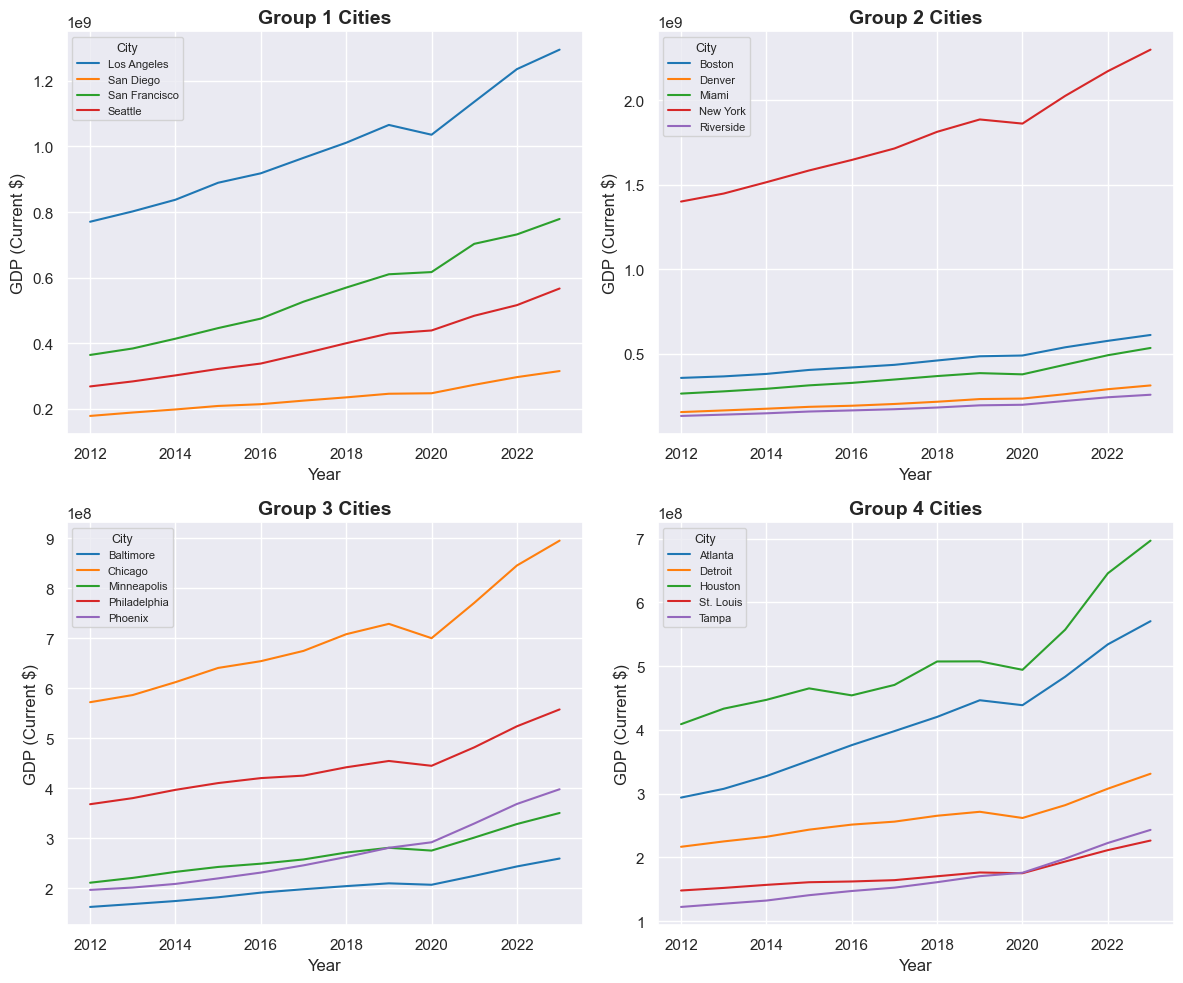

In [119]:
#Step 10: Create the line plots for each group of cities
sns.set_theme(style="darkgrid")

#Force the group order
group_order = ["Group 1", "Group 2", "Group 3", "Group 4"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, group in zip(axes, group_order):
    subset = df_quads[df_quads["RegionGroup"] == group]

    sns.lineplot(
        data=subset,
        x="Year",
        y="CurrentGDP",
        hue="GeoName",
        ax=ax,
        palette="tab10",
    )

    ax.set_title(f"{group} Cities", fontsize=14, weight="bold")
    ax.set_xlabel("Year")
    ax.set_ylabel("GDP (Current $)")

    #Legend for THIS group only
    leg = ax.legend(
        title="City",
        fontsize=8,
        title_fontsize=9,
        loc="upper left",
        frameon=True
    )

plt.tight_layout()
plt.show()

In [120]:
#Step 11: Create a dataframe that shows each city ranked by average current GDP across all years presented.  sort from highest to lowest
avg_gdp_ranked = (
    df_clean
        .groupby("GeoName")["CurrentGDP"]
        .mean()
        .sort_values(ascending=False)
        .reset_index()
        .rename(columns={"CurrentGDP": "AvgCurrentGDP"})
)

avg_gdp_ranked

,GeoName,AvgCurrentGDP
0,New York,1.780124e+09
1,Los Angeles,9.969392e+08
2,Chicago,6.989040e+08
3,San Francisco,5.516187e+08
4,WashingtonDC,5.499054e+08
5,DFW,5.209953e+08
6,Houston,5.074661e+08
7,Boston,4.595624e+08
8,Philadelphia,4.422326e+08
9,Atlanta,4.125140e+08
